<a href="https://colab.research.google.com/github/YannisZang/cs-5805-Machine-Learning/blob/main/Double_descent_illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(25,) (25,)


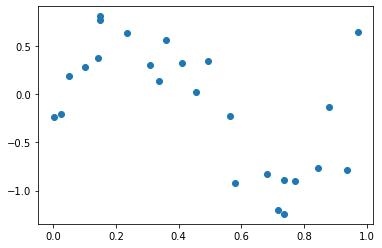

In [ ]:
data = np.array([
    0.001399613, -0.23436656,
    0.971629779,  0.64689524,
    0.579119475, -0.92635765,
    0.335693937,  0.13000706,
    0.736736086, -0.89294863,
    0.492572335,  0.33854780,
    0.737133774, -1.24171910,
    0.563693769, -0.22523318,
    0.877603280, -0.12962722,
    0.141426545,  0.37632006,
    0.307203910,  0.30299077,
    0.024509308, -0.21162739,
    0.843665029, -0.76468719,
    0.771206067, -0.90455412,
    0.149670258,  0.77097952,
    0.359605608,  0.56466366,
    0.049612895,  0.18897607,
    0.409898906,  0.32531750,
    0.935457898, -0.78703491,
    0.149476207,  0.80585375,
    0.234315216,  0.62944986,
    0.455297119,  0.02353327,
    0.102696671,  0.27621694,
    0.715372314, -1.20379729,
    0.681745393, -0.83059624 ]).reshape(25,2)
y = data[:,1]
x = data[:,0]
print(x.shape, y.shape)
x_train, y_train = x[::2], y[::2]
x_test, y_test = x[1::2], y[1::2]
plt.scatter(x, y)

In [ ]:
def chebyshev_regression_fit(x, y, degree):
    X = np.polynomial.chebyshev.chebvander(x, degree)
    X_inv = np.linalg.pinv(X)
    beta = X_inv @ y  # Solve least squares

    y_pred = X @ beta
    error = np.mean((y_pred - y) ** 2)
    return beta, error

def chebyshev_regression_predict(x, beta, y):
    degree = len(beta) - 1
    X = np.polynomial.chebyshev.chebvander(x, degree)
    y_pred = X @ beta
    error = np.mean((y_pred - y) ** 2)
    return y_pred, error


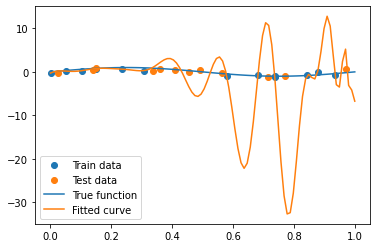

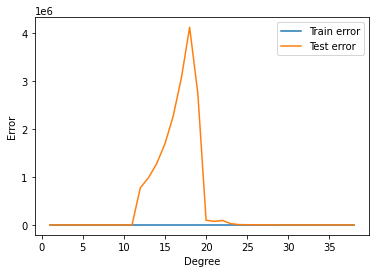

In [ ]:
errors = []

N = len(x_train)
D = N * 3

for d in range(1, D):
    beta, train_error = chebyshev_regression_fit(x_train, y_train, d)
    y_pred, test_error = chebyshev_regression_predict(x_test, beta, y_test)
    errors.append([d, train_error, test_error])

# plot x_train, y_train, and the fitted curve
plt.scatter(x_train, y_train, label='Train data')
plt.scatter(x_test, y_test, label='Test data')
x_plot = np.linspace(0, 1, 100)
y_plot = np.sin(2 * np.pi * x_plot)
plt.plot(x_plot, y_plot, label='True function')
plt.plot(x_plot, chebyshev_regression_predict(x_plot, beta, y_plot)[0], label='Fitted curve')
plt.legend()
plt.show()

# plot errors
errors = np.array(errors)
plt.plot(errors[:, 0], errors[:, 1], label='Train error')
plt.plot(errors[:, 0], errors[:, 2], label='Test error')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


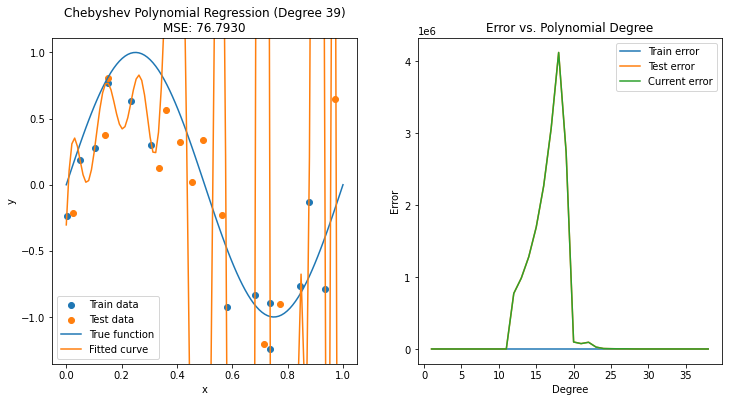

In [ ]:
from matplotlib.animation import FuncAnimation

fig, (ax_fit, ax_error) = plt.subplots(1, 2, figsize=(12, 6))

# Initialize the plots
ax_fit.scatter(x_train, y_train, label='Train data')
ax_fit.scatter(x_test, y_test, label='Test data')
ax_fit.plot(x_plot, y_plot, label='True function')
line_fit, = ax_fit.plot([], [], label='Fitted curve')
ax_fit.legend()
ax_fit.set_title('Chebyshev Polynomial Regression')
ax_fit.set_xlabel('x')
ax_fit.set_ylabel('y')

ax_error.plot(errors[:, 0], errors[:, 1], label='Train error')
ax_error.plot(errors[:, 0], errors[:, 2], label='Test error')
line_error, = ax_error.plot([], [], label='Current error')
ax_error.legend()
ax_error.set_title('Error vs. Polynomial Degree')
ax_error.set_xlabel('Degree')
ax_error.set_ylabel('Error')

def init():
    line_fit.set_data([], [])
    line_error.set_data([], [])
    return line_fit, line_error

def update(frame):
    d = frame + 1
    beta, train_error = chebyshev_regression_fit(x_train, y_train, d)
    y_pred, test_error = chebyshev_regression_predict(x_plot, beta, y_plot)

    line_fit.set_data(x_plot, y_pred)
    line_error.set_data(errors[:d, 0], errors[:d, 2])

    ax_fit.set_title(f'Chebyshev Polynomial Regression (Degree {d})\nMSE: {test_error:.4f}')
    return line_fit, line_error

ani = FuncAnimation(fig, update, frames=D, init_func=init, blit=True)
ani.save('double_descent_chebyshev_regression.gif', writer='imagemagick', fps=3)

![image.png](attachment:./image_0_5.png)

![image.png](attachment:./image_0_6.png)